Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98
New mean absolute error = 241907.27
Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


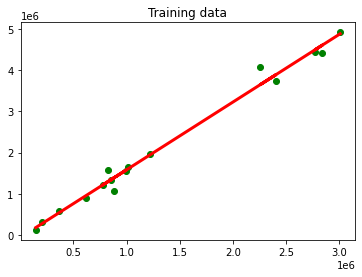

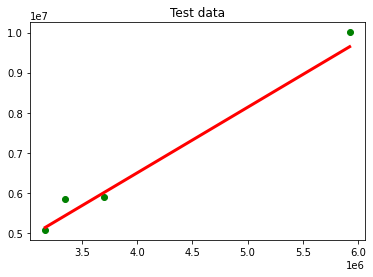

In [1]:
"""
Linear Regression
Need the matplotlib lib and VehiclesItaly.txt
Instructor: Dr. Chih-Hao Ku
"""

#loading the file
filename = "../data/source/VehiclesItaly.txt"

X = [] #independent variable (explantory variable)
y = [] #dependent variable (response variable)
"""
1. open the file r(reading), w(writing), a(appending), r+(read and write)
2. prase each line and split it baed on the comma operator.
3. convert values into floating point values
4. Save them in X and Y
"""
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
        
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

# Create linear regression object
from sklearn import linear_model
# ordinary least squares linear regression
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
# Fit the linear model. 
# The fit() method takes the input data and trains the model. 
linear_regressor.fit(X_train, y_train)

# Predict the training data with the model fitted:
y_train_pred = linear_regressor.predict(X_train)

# Plot training data outputs
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='red', linewidth=3)
plt.title('Training data')
plt.show

# Plot testing data outputs
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='red', linewidth=3)
plt.title('Test data')
plt.show


# Measure performance
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))


"""
 It is desirable to have a way to persist the model for future use without having to retrain
"""
# Model persistence
# The pickle module transforms an arbitrary Python object into a series of bytes.
import pickle

#The regressor object will be saved in the saved_model.pkl file.
output_model_file = "3_model_linear_regr.pkl"

# The PKL file is created using Python pickle and the dump() method and is loaded using Python pickle and the load() method.
with open(output_model_file, 'wb') as f: #'wb' for writing binary file
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f: #'rb' for reading binary file
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2)) 

"""
Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
Ridge regression is a regularization method where a penalty is imposed on the size of the coefficients.
alpha controls the complexity, default=1.0.
As alpha gets closer to 0, the ridge regressor tends to become more like a linear regressor with ordinary least squares.
So, if you want to make it robust against outliers, you need to assign a higher value to alpha. 
Regularization strength; must be a positive float. 
Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
Larger values specify stronger regularization.
"""
# Fit_intercept: True by default. Whether to calculate the intercept for this model. 
#If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
# max_iter: int, default=100. Maximum number of iterations taken for the solvers to converge.
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))
